In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pdb

# default params
m1 = 0.5 # mass 1 (msun)
m2 = 0.25 # mass 2 (msun)
P0 = 0.005 # period (days)
Pdot = 1e-11 # abs rate of change of period (days/days)
freq_0 = 2/P0/(60*60*24) # quadrupole radiation in hertz (twice the freq of the source)


7.199999999999999

In [11]:
# constants
G = 6.67e-11 # grav constant (m^3/kg/s^2)
msun = 1.989e30 # solar mass (kg)
c = 299792458 # speed of light (m/s)

def mchirp(m1,m2): 
    return (m1*m2)**(3/5.)/(m1+m2)**(1/5.)

def time(n=100,mean_dt=3,sig_t=2):
    """
    Returns time array of length n with dt given by Gaussian distribution
    
    INPUT:
            n = length of time array
                Default: 100
                
            mean_dt = average dt between each time value
                Default: 3
                
            sig_t = standard deviation of the Gaussian
                Default: 2
            
    OUTPUT:
            t = time array
        
    """
    t = np.zeros(n)

    for i in range(len(t)):
        if i != 0:
            t[i] += t[i-1] + np.abs(np.random.normal(mean_dt,sig_t,1)) 
            
    return t

def time_to_coalescence(f0, m1, m2=None):
    """
    INPUTS:
            f0 = starting frequency in hertz
            
            m1 = mass of star 1 in kg
            
            m2 = mass of star 2 in kg (If None, m1 assumed to be mchirp)
            
    OUTPUTS:
            freqs = frequency array in hertz (nan after coalescence)
            
    """
    if m2 is None:
        mc = m1
    else:
        mc = mchirp(m1,m2)
    return 5./256. * (np.pi*f0)**(-8/3) * (G*mc/c**3)**(-5/3)


def freqqs(times, m1,m2, f0):
    """
    INPUTS:
            times = time array in seconds
            
            m1 = mass of star 1 in kg
            
            m2 = mass of star 2 in kg
            
            f0 = starting frequency in hertz
    OUTPUTS:
            freqs = frequency array in hertz (nan after coalescence)
            
    """
    tcoal= time_to_coalescence(f0,m1,m2)

    times= tcoal-times
    
    freqs=1/np.pi*(5/256./times)**(3/8.)*(G*mchirp(m1,m2)/c**3)**(-5/8.)
    
    return freqs


def pdot_phasefold(times, P, Pdot, t0=0):
    """
    @author: kburdge
       
    Function which returns phases corresponding to timestamps in a lightcurve 
    given a period P, period derivative Pdot, and reference epoch t0
    
    If no reference epoch is supplied, reference epoch is set to earliest time in lightcurve
    
    INPUTS:
            times = time array (days)
            
            P = starting period
            
            Pdot = rate of change of period in units of time/time (days/day)
            
            t0 = start time
            
    OUTPUTS:
            phases = phases for given time array, period, and Pdot
    
    """
    
    if t0==0:
            times=times-np.min(times)
    else:
            times=times-t0
    
    phases=times-1/2*Pdot/P*(times)**2
    
    return phases

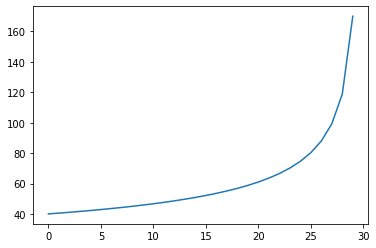

In [12]:
times = np.arange(30)
#testing for ~GW170817 params
plt.plot(times,freqqs(times, 1.36*msun, 1.17*msun,f0=40))

In [37]:
times = time(n=100,mean_dt=10)
pdot_f = pdot_phasefold(times, P0, Pdot)
frequency_series = freqqs(times*60*60*24, 0.5*msun, 0.25*msun,f0=freq_0)

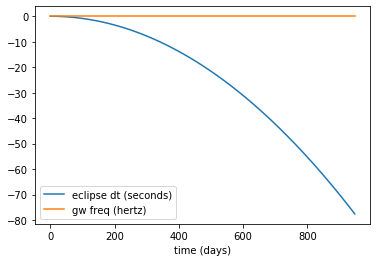

In [38]:
plt.plot(times,(pdot_f-times)*86400,label="eclipse dt (seconds)")
plt.plot(times,frequency_series,label="gw freq (hertz)")
plt.xlabel("time (days)")
plt.legend()


In [39]:
np.savetxt("phase_freq.dat",np.array([times,(pdot_f-times)*86400,frequency_series]).T, header = 'time(days) eclipse_dt(seconds) gw_freq(hertz)')

In [40]:
np.array([times,(pdot_f-times)*86400,frequency_series]).T


array([[ 0.00000000e+00,  0.00000000e+00,  4.62962963e-03],
       [ 1.09988710e+01, -1.04522540e-02,  4.62962984e-03],
       [ 2.24359754e+01, -4.34914264e-02,  4.62963006e-03],
       [ 3.37284478e+01, -9.82893474e-02,  4.62963027e-03],
       [ 4.06167602e+01, -1.42535912e-01,  4.62963040e-03],
       [ 4.89159336e+01, -2.06735204e-01,  4.62963056e-03],
       [ 5.91498804e+01, -3.02288402e-01,  4.62963075e-03],
       [ 6.87153179e+01, -4.07963080e-01,  4.62963093e-03],
       [ 7.48689075e+01, -4.84302526e-01,  4.62963105e-03],
       [ 8.36319383e+01, -6.04307615e-01,  4.62963122e-03],
       [ 9.22357023e+01, -7.35041500e-01,  4.62963138e-03],
       [ 1.05653007e+02, -9.64444997e-01,  4.62963163e-03],
       [ 1.16869632e+02, -1.18009535e+00,  4.62963185e-03],
       [ 1.31033826e+02, -1.48347622e+00,  4.62963212e-03],
       [ 1.37815258e+02, -1.64099911e+00,  4.62963225e-03],
       [ 1.45216589e+02, -1.82199091e+00,  4.62963239e-03],
       [ 1.52045201e+02, -1.99737300e+00